In [1]:
# @Date    : Jun-28-20 20:23
# @Author  : Kelly Hwong (you@example.org)
# @Link    : http://example.org

## Simple Sarsa train
lession 2 训练简单的 Sarsa 模型。

# Step1 安装依赖

In [2]:
!pip install gym --user

# Step2 导入依赖

In [3]:
import gym
import numpy as np
import time
from lesson2.sarsa.gridworld import CliffWalkingWapper
# from lesson2.sarsa.agent import SarsaAgent

In [4]:
env = gym.make("CliffWalking-v0")
env = CliffWalkingWapper(env)
env.reset()

36

# Step3 Agent
* `Agent`是和环境`environment`交互的主体。
* `predict()`方法：输入观察值`observation`（或者说状态`state`），输出动作值
* `sample()`方法：在`predict()`方法基础上使用`ε-greedy`增加探索
* `learn()`方法：输入训练数据，完成一轮Q表格的更新

In [5]:
class SarsaAgent(object):
    def __init__(self, obs_n, act_n, learning_rate=0.01, gamma=0.9, e_greed=0.1):
        self.act_n = act_n      # 动作维度，有几个动作可选
        self.lr = learning_rate # 学习率
        self.gamma = gamma      # reward的衰减率
        self.epsilon = e_greed  # 按一定概率随机选动作
        self.Q = np.zeros((obs_n, act_n)) # 初始化 Q表 为全 0 

    # 根据输入观察值，采样输出的动作值，带探索
    def sample(self, obs):
        ######################################################################
        ######################################################################
        #
        # 1. 请完成sample函数功能
        #
        ######################################################################
        ######################################################################
        if np.random.uniform(0, 1) < (1.0 - self.epsilon):
            action = self.predict(obs)
        else:
            action = np.random.choice(self.act_n)
        return action

    # 根据输入观察值，预测输出的动作值
    def predict(self, obs):
        ######################################################################
        ######################################################################
        #
        # 2. 请完成predict函数功能
        #
        ######################################################################
        ######################################################################
        Q_list = self.Q[obs, :]
        maxQ = np.max(Q_list)
        action_list = np.where(Q_list == maxQ)[0]
        action = np.random.choice(action_list)
        return action

    # 学习方法，也就是更新Q-table的方法
    def learn(self, obs, action, reward, next_obs, next_action, done):
        """ on-policy
            obs: 交互前的obs, s_t
            action: 本次交互选择的action, a_t
            reward: 本次动作获得的奖励r
            next_obs: 本次交互后的obs, s_t+1
            next_action: 根据当前Q表格, 针对next_obs会选择的动作, a_t+1
            done: episode是否结束
        """
        ######################################################################
        ######################################################################
        #
        # 3. 请完成learn函数功能（Sarsa）
        #
        ######################################################################
        ######################################################################
        predict_Q = self.Q[obs, action]
        if done: # 没有下一个状态了
            target_Q = reward
        else:
            target_Q = reward + self.gamma * self.Q[next_obs, next_action] # Sarsa
        self.Q[obs, action] += self.lr * (target_Q - predict_Q) # 修正Q

    # 保存Q表格数据到文件
    def save(self):
        npy_file = './q_table.npy'
        np.save(npy_file, self.Q)
        print(npy_file + ' saved.')
    
    # 从文件中读取数据到Q表格中
    def restore(self, npy_file='./q_table.npy'):
        self.Q = np.load(npy_file)
        print(npy_file + ' loaded.')


# Step4 Training && Test（训练&&测试）

In [6]:
def run_episode(env, agent, render=False):
    total_steps = 0 # 记录每个episode走了多少step
    total_reward = 0

    obs = env.reset() # 重置环境, 重新开一局（即开始新的一个episode）
    action = agent.sample(obs) # 根据算法选择一个动作

    while True:
        next_obs, reward, done, _ = env.step(action) # 与环境进行一个交互
        next_action = agent.sample(next_obs) # 根据算法选择一个动作
        # 训练 Sarsa 算法
        agent.learn(obs, action, reward, next_obs, next_action, done)

        action = next_action
        obs = next_obs  # 存储上一个观察值
        total_reward += reward
        total_steps += 1 # 计算step数
        if render:
            env.render() #渲染新的一帧图形
        if done:
            break
    return total_reward, total_steps

def test_episode(env, agent):
    total_reward = 0
    obs = env.reset()
    while True:
        action = agent.predict(obs) # greedy
        next_obs, reward, done, _ = env.step(action)
        total_reward += reward
        obs = next_obs
        # time.sleep(0.5)
        # env.render()
        if done:
            break
    return total_reward


# Step 5 创建环境和Agent，启动训练

In [7]:
# 使用gym创建迷宫环境，设置is_slippery为False降低环境难度
env = gym.make("FrozenLake-v0", is_slippery=False)  # 0 left, 1 down, 2 right, 3 up

# 创建一个agent实例，输入超参数
agent = SarsaAgent(
        obs_n=env.observation_space.n,
        act_n=env.action_space.n,
        learning_rate=0.1,
        gamma=0.9,
        e_greed=0.1)


# 训练500个episode，打印每个episode的分数
reward_log = []
for episode in range(500):
    ep_reward, ep_steps = run_episode(env, agent, False) # 要看小乌龟就设置为 True
    reward_log.append(ep_reward)
    print('Episode %s: steps = %s , reward = %.1f' % (episode, ep_steps, ep_reward))

# 全部训练结束，查看算法效果
test_reward = test_episode(env, agent)
print('test reward = %.1f' % (test_reward))

Episode 0: steps = 3 , reward = 0.0
Episode 1: steps = 2 , reward = 0.0
Episode 2: steps = 25 , reward = 0.0
Episode 3: steps = 4 , reward = 0.0
Episode 4: steps = 6 , reward = 0.0
Episode 5: steps = 7 , reward = 0.0
Episode 6: steps = 2 , reward = 0.0
Episode 7: steps = 20 , reward = 0.0
Episode 8: steps = 2 , reward = 0.0
Episode 9: steps = 6 , reward = 0.0
Episode 10: steps = 5 , reward = 0.0
Episode 11: steps = 3 , reward = 0.0
Episode 12: steps = 15 , reward = 1.0
Episode 13: steps = 4 , reward = 0.0
Episode 14: steps = 4 , reward = 0.0
Episode 15: steps = 3 , reward = 0.0
Episode 16: steps = 9 , reward = 1.0
Episode 17: steps = 9 , reward = 0.0
Episode 18: steps = 3 , reward = 0.0
Episode 19: steps = 4 , reward = 0.0
Episode 20: steps = 4 , reward = 0.0
Episode 21: steps = 2 , reward = 0.0
Episode 22: steps = 14 , reward = 0.0
Episode 23: steps = 5 , reward = 0.0
Episode 24: steps = 2 , reward = 0.0
Episode 25: steps = 2 , reward = 0.0
Episode 26: steps = 6 , reward = 0.0
Episode

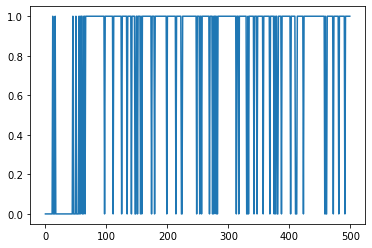

In [8]:
import matplotlib.pyplot as plt
plt.plot(reward_log)

In [9]:
env.observation_space.n

16

In [10]:
env.action_space.n

4